## load data

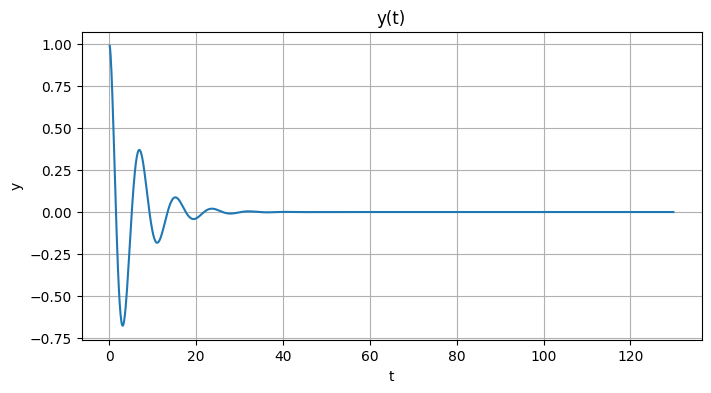

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルのパス
csv_path = "data/AC_waveform_data_11.5724.csv"

# データの読み込み
df = pd.read_csv(csv_path)

t_data = np.array(df.iloc[:, 0])
y_data = np.array(df.iloc[:, 1])

plt.figure(figsize=(8, 4))
plt.plot(t_data, y_data)
plt.xlabel('t')
plt.ylabel('y')
plt.title('y(t)')
plt.grid(True)
plt.show()

## Curve Fit

フィッティングで得られた最適パラメータ:
      A1: 1.2528
 lambda1: -0.1730
  omega1: 0.7505
    phi1: 2.4910
      A2: 1.2106
 lambda2: -0.6210
  omega2: 0.8538
    phi2: 0.2024


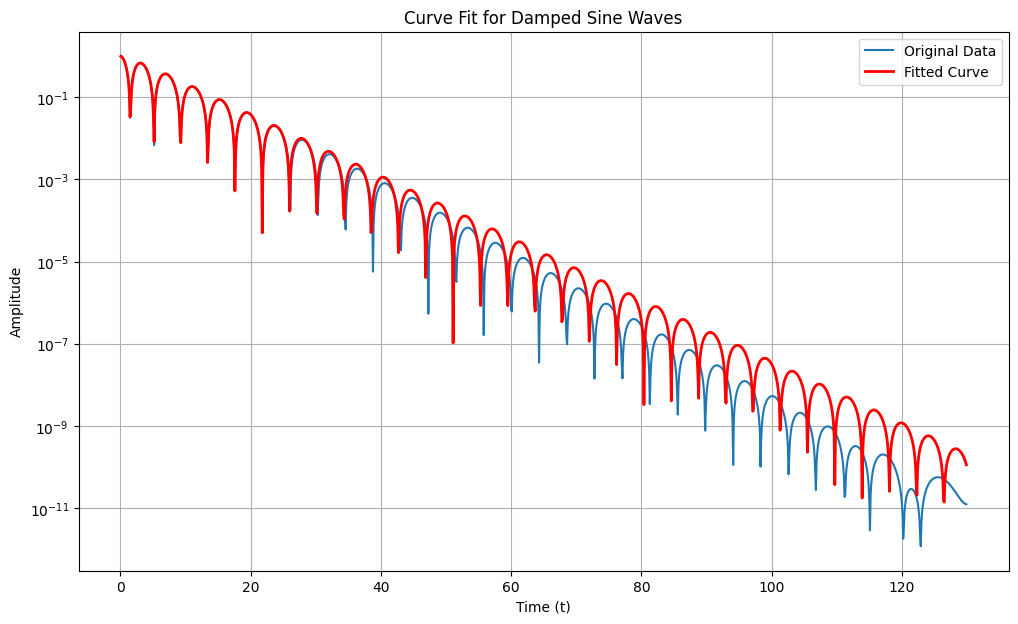

In [138]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def fit_func(t, A1, lambda1, omega1, phi1, A2, lambda2, omega2, phi2):
    """
    フィッティング対象の関数：2つの減衰正弦波の和
    f(t) = A1*exp(lambda1*t)*sin(omega1*t+phi1) + A2*exp(lambda2*t)*sin(omega2*t+phi2)
    """
    term1 = A1 * np.exp(lambda1 * t) * np.sin(omega1 * t + phi1)
    term2 = A2 * np.exp(lambda2 * t) * np.sin(omega2 * t + phi2)
    return term1 + term2

# --- 1. データの準備 ---
# (オプション) サンプルデータの生成
# 実際には、この部分をご自身のデータ読み込み処理に置き換えてください。
# # 例: t_data, y_data = np.loadtxt('my_waveform_data.csv', delimiter=',', unpack=True)
# p_true = [1.5, -0.1, 5.0, np.pi/4, 1.0, -0.2, 12.0, np.pi/2] # 真のパラメータ
# t_data = np.linspace(0, 20, 500)
# # ノイズを加えた実データ（のつもり）
# y_data = fit_func(t_data, *p_true) + 0.15 * np.random.normal(size=t_data.size)


# --- 2. カーブフィッティングの実行 ---
# パラメータの初期推測値 (p0)
# 良い初期値を与えることがフィッティング成功の鍵となります。
# データを見て、おおよその値を推測します。
initial_guess = [
    1.0,  # A1
    # -0.2116451411183, # lambda1
    # 0.7391984327078,  # omega1
    - 0.17792, # lambda1
    0.74734,  # omega1
    0,    # phi1
    0.8,  # A2
    # -0.217234709569, # lambda2
    # 0.736312554, # omega2
    -0.54783, # lambda2
    0.693422, # omega2
    0     # phi2
]

# パラメータの境界 (bounds) を設定 (オプションですが推奨)
# A > 0, lambda < 0 など、物理的な制約を設けることで収束しやすくなります。
bounds = (
    [0, -np.inf, 0, -2*np.pi, 0, -np.inf, 0, -2*np.pi], # 下限
    [np.inf, 0, np.inf, 2*np.pi, np.inf, 0, np.inf, 2*np.pi]  # 上限
)

try:
    # curve_fit を実行
    popt, pcov = curve_fit(
        fit_func,
        t_data,
        y_data,
        p0=initial_guess,
        bounds=bounds,
        maxfev=10000 # 計算回数の上限を増やす
    )

    # --- 3. 結果の表示 ---
    print("フィッティングで得られた最適パラメータ:")
    param_names = ['A1', 'lambda1', 'omega1', 'phi1', 'A2', 'lambda2', 'omega2', 'phi2']
    for name, value in zip(param_names, popt):
        print(f"{name:>8s}: {value:.4f}")

    # --- 4. 結果のプロット ---
    plt.figure(figsize=(12, 7))
    plt.semilogy(t_data, np.abs(y_data), label='Original Data')
    plt.semilogy(t_data, np.abs(fit_func(t_data, *popt)), label='Fitted Curve', color='red', linewidth=2)
    plt.title('Curve Fit for Damped Sine Waves')
    plt.xlabel('Time (t)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

except RuntimeError as e:
    print(f"フィッティングに失敗しました: {e}")
    print("初期推測値(p0)や境界(bounds)を見直してください。")

In [ ]:
initial_guess = [
    1.0,  # A1
    # -0.2116451411183, # lambda1
    # 0.7391984327078,  # omega1
    - 0.17792, # lambda1
    0.74734,  # omega1
    0,    # phi1
    0.8,  # A2
    # -0.217234709569, # lambda2
    # 0.736312554, # omega2
    -0.54783, # lambda2
    0.693422, # omega2
    0     # phi2
]

In [142]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import shutil

# 1. アニメーションのパラメータ設定
num_frames = 100  # フレーム数
frame_duration = 10  # 各フレームの表示時間（ミリ秒）
deltai = 10

# 2. フレームを保存するディレクトリの作成
output_dir = "animation_frames"
os.makedirs(output_dir, exist_ok=True)

# 解決策 1: 結果を保存するための空のリストを初期化
reqnm_history1 = []
imqnm_history1 = []
reqnm_history2 = []
imqnm_history2 = []

# 3. 各フレームの画像を生成して保存
print("Generating frames...")
for i in range(num_frames):

    try:
        # curve_fit を実行
        popt, pcov = curve_fit(
            fit_func,
            t_data[deltai*i:],
            y_data[deltai*i:],
            p0=initial_guess,
            bounds=bounds,
            maxfev=10000 # 計算回数の上限を増やす
        )

        # --- 3. 結果の表示 ---
        # print("フィッティングで得られた最適パラメータ:")
        # param_names = ['A1', 'A2', 'A3', 'A4', 'lambda1', 'omega1']
        # for name, value in zip(param_names, popt):
        #     print(f"{name:>8s}: {value:.4f}")


        # --- 4. 結果のプロット ---
        # fig = plt.figure(figsize=(12, 7))
        # plt.semilogy(t_data, np.abs(y_data), label='Original Data')
        # plt.semilogy(t_data, np.abs(fit_func(t_data, *popt)), label='Fitted Curve', color='red', linewidth=2)
        # plt.title(f'Curve Fit for Damped Sine Waves - Frame {t_data[10*i-1]}')
        # plt.xlabel('Time (t)')
        # plt.ylabel('Amplitude')
        # plt.legend()
        # plt.grid(True)
        # # plt.show()
        # # ファイル名を設定
        # # 0埋めすることで、Pillowが正しい順序で画像を読み込むようにする
        # frame_filename = os.path.join(output_dir, f"frame_{i:04d}.png")
        # plt.savefig(frame_filename, dpi=100) # dpiで解像度を設定
        # plt.close(fig) # メモリを解放するために図を閉じる
        # if (i + 1) % 10 == 0:
        #     print(f"  {i+1} frames generated...")

        # 解決策 2: 計算結果をリストに追加
        reqnm_history1.append(abs(popt[2]))
        imqnm_history1.append(abs(popt[1]))
        reqnm_history2.append(abs(popt[6]))
        imqnm_history2.append(abs(popt[5]))

        reqnm = [abs(popt[2]), abs(popt[6])]
        imqnm = [abs(popt[1]), abs(popt[5])]
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 18))
        if y_data is not None:
            ax1.semilogy(t_data, np.abs(y_data), label='Original Data')
        ax1.semilogy(t_data, np.abs(fit_func(t_data, *popt)), label='Fitted Curve', color='red', linewidth=2)
        ax1.set_title(f'Curve Fit for Damped Sine Waves - t_i = {t_data[deltai*i]}')
        ax1.set_xlabel('Time (t)')
        ax1.set_ylabel('Amplitude')
        ax1.legend()
        ax1.grid(True)

        ax2.plot(reqnm_history1, imqnm_history1, '-o', label='QNM Trajectory', alpha=0.4)
        ax2.plot(reqnm_history2, imqnm_history2, '-o', label='QNM Trajectory', alpha=0.4)
        ax2.plot(reqnm, imqnm, 'o')
        ax2.plot([0.7391984327078, 0.736312554], [0.2116451411183, 0.217234709569], 'x', c='red')
        ax2.plot([initial_guess[2], initial_guess[6]], [-initial_guess[1], -initial_guess[6]], '+')
        ax2.set_xlim(0.6, 0.8)
        ax2.set_ylim(0.10, 0.6)
        ax2.set_title(f'Curve Fit for Damped Sine Waves - t_i = {t_data[deltai*i]}')
        ax2.set_xlabel('Re omega')    
        ax2.set_ylabel('Im omega') 
        # plt.xlim(0.72, 0.77)
        # plt.ylim(0.17, 0.23)
        frame_filename = os.path.join(output_dir, f"qnm_{i:04d}.png")
        plt.savefig(frame_filename, dpi=100) # dpiで解像度を設定
        plt.close(fig) # メモリを解放するために図を閉じる
        if (i + 1) % 10 == 0:
            print(f"  {i+1} frames generated...")

    except RuntimeError as e:
        print(f"Frame {i+1} generation failed: {e}")
        continue

# 4. 生成した画像を読み込み、GIFアニメーションを作成
print("Creating GIF animation...")
image_files = sorted([os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.png')])

if not image_files:
    print("No PNG images found in the output directory. Animation cannot be created.")
else:
    images = []
    for filename in image_files:
        images.append(Image.open(filename))

    # 最初の画像を使って、残りの画像を結合
    if images:
        images[0].save(
            'animation.gif',
            save_all=True,
            append_images=images[1:],
            duration=frame_duration,
            loop=0  # 0は無限ループ
        )
        print("Animation 'animation.gif' created successfully!")
    else:
        print("No images were loaded for animation creation.")

# 5. 生成したフレーム画像を削除（オプション）
output_dir = "animation_frames"
if os.path.exists(output_dir):
    try:
        shutil.rmtree(output_dir)
        print(f"ディレクトリ '{output_dir}' を正常に削除しました。")
    except OSError as e:
        print(f"エラー: ディレクトリの削除に失敗しました。 {e.filename} - {e.strerror}.")
else:
    print(f"ディレクトリ '{output_dir}' が見つかりません。")

Generating frames...
  10 frames generated...
  20 frames generated...
  30 frames generated...
  40 frames generated...
  50 frames generated...
  60 frames generated...
  70 frames generated...
  80 frames generated...
  90 frames generated...
  100 frames generated...
Creating GIF animation...
Animation 'animation.gif' created successfully!
ディレクトリ 'animation_frames' を正常に削除しました。


## Curve Fit (Ac model)

フィッティングで得られた最適パラメータ:
      A1: 126.2838
      A2: -97.7684
      A3: -121.7074
      A4: 94.9349
 lambda1: -0.5370
  omega1: 0.6307


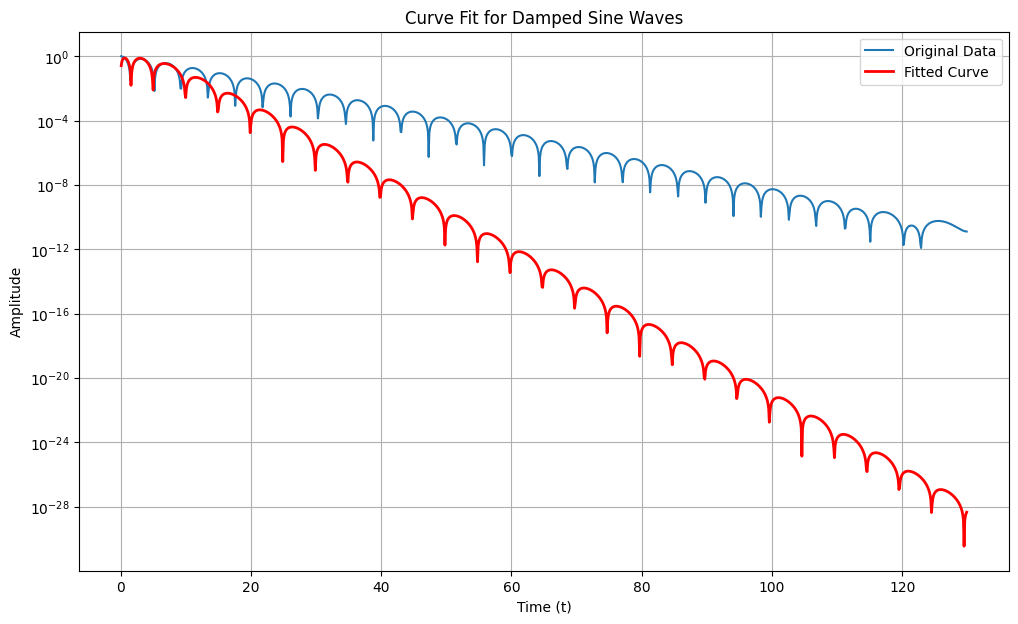

In [115]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def fit_func(t, A1, A2, A3, A4, lambda1, omega1):
    """
    フィッティング対象の関数：2つの減衰正弦波の和
    f(t) = A1*exp(lambda1*t)*sin(omega1*t+phi1) + A2*exp(lambda2*t)*sin(omega2*t+phi2)
    """
    return (A1 + A2 * t ) * np.exp(lambda1 * t) * np.sin(omega1 * t ) + (A3 + A4 * t ) * np.exp(lambda1 * t) * np.sin(omega1 * t ) 


# --- 2. カーブフィッティングの実行 ---
# パラメータの初期推測値 (p0)
# 良い初期値を与えることがフィッティング成功の鍵となります。
# データを見て、おおよその値を推測します。
initial_guess = [
    1.0,  # A1
    1.0,  # A2
    1.0,  # A3
    1.0,  # A4
    # -0.2116451411183, # lambda1
    # 0.7391984327078,  # omega1
    - 0.17792, # lambda1
    0.74734  # omega1
]

# パラメータの境界 (bounds) を設定 (オプションですが推奨)
# A > 0, lambda < 0 など、物理的な制約を設けることで収束しやすくなります。
bounds = (
    [-np.inf, -np.inf, -np.inf, -np.inf, -np.inf, -2*np.pi,], # 下限
    [np.inf, np.inf, np.inf, np.inf, np.inf, 2*np.pi]  # 上限
)

try:
    # curve_fit を実行
    popt, pcov = curve_fit(
        fit_func,
        t_data,
        y_data,
        p0=initial_guess,
        bounds=bounds,
        maxfev=10000 # 計算回数の上限を増やす
    )

    # --- 3. 結果の表示 ---
    print("フィッティングで得られた最適パラメータ:")
    param_names = ['A1', 'A2', 'A3', 'A4', 'lambda1', 'omega1']
    for name, value in zip(param_names, popt):
        print(f"{name:>8s}: {value:.4f}")

    # --- 4. 結果のプロット ---
    plt.figure(figsize=(12, 7))
    plt.semilogy(t_data, np.abs(y_data), label='Original Data')
    plt.semilogy(t_data, np.abs(fit_func(t_data, *popt)), label='Fitted Curve', color='red', linewidth=2)
    plt.title('Curve Fit for Damped Sine Waves')
    plt.xlabel('Time (t)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

except RuntimeError as e:
    print(f"フィッティングに失敗しました: {e}")
    print("初期推測値(p0)や境界(bounds)を見直してください。")

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import shutil

# 1. アニメーションのパラメータ設定
num_frames = 100  # フレーム数
frame_duration = 10  # 各フレームの表示時間（ミリ秒）
deltai = 10

# 2. フレームを保存するディレクトリの作成
output_dir = "animation_frames"
os.makedirs(output_dir, exist_ok=True)

# 解決策 1: 結果を保存するための空のリストを初期化
reqnm_history = []
imqnm_history = []

# 3. 各フレームの画像を生成して保存
print("Generating frames...")
for i in range(num_frames):

    try:
        # curve_fit を実行
        popt, pcov = curve_fit(
            fit_func,
            t_data[deltai*i:],
            y_data[deltai*i:],
            p0=initial_guess,
            bounds=bounds,
            maxfev=10000 # 計算回数の上限を増やす
        )

        # --- 3. 結果の表示 ---
        # print("フィッティングで得られた最適パラメータ:")
        # param_names = ['A1', 'A2', 'A3', 'A4', 'lambda1', 'omega1']
        # for name, value in zip(param_names, popt):
        #     print(f"{name:>8s}: {value:.4f}")


        # --- 4. 結果のプロット ---
        # fig = plt.figure(figsize=(12, 7))
        # plt.semilogy(t_data, np.abs(y_data), label='Original Data')
        # plt.semilogy(t_data, np.abs(fit_func(t_data, *popt)), label='Fitted Curve', color='red', linewidth=2)
        # plt.title(f'Curve Fit for Damped Sine Waves - Frame {t_data[10*i-1]}')
        # plt.xlabel('Time (t)')
        # plt.ylabel('Amplitude')
        # plt.legend()
        # plt.grid(True)
        # # plt.show()
        # # ファイル名を設定
        # # 0埋めすることで、Pillowが正しい順序で画像を読み込むようにする
        # frame_filename = os.path.join(output_dir, f"frame_{i:04d}.png")
        # plt.savefig(frame_filename, dpi=100) # dpiで解像度を設定
        # plt.close(fig) # メモリを解放するために図を閉じる
        # if (i + 1) % 10 == 0:
        #     print(f"  {i+1} frames generated...")

        # 解決策 2: 計算結果をリストに追加
        reqnm_history.append(abs(popt[5]))
        imqnm_history.append(abs(popt[4]))

        reqnm = [abs(popt[5])]
        imqnm = [abs(popt[4])]
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 18))
        if y_data is not None:
            ax1.semilogy(t_data, np.abs(y_data), label='Original Data')
        ax1.semilogy(t_data, np.abs(fit_func(t_data, *popt)), label='Fitted Curve', color='red', linewidth=2)
        ax1.set_title(f'Curve Fit for Damped Sine Waves - t_i = {t_data[deltai*i]}')
        ax1.set_xlabel('Time (t)')
        ax1.set_ylabel('Amplitude')
        ax1.legend()
        ax1.grid(True)

        ax2.plot(reqnm_history, imqnm_history, 'o-', label='QNM Trajectory', alpha=0.4)
        ax2.plot(reqnm, imqnm, 'o')
        ax2.plot([0.7391984327078, 0.736312554], [0.2116451411183, 0.217234709569], 'x')
        ax2.plot([initial_guess[5]], [-initial_guess[4]], '+')
        ax2.set_xlim(0.6, 0.8)
        ax2.set_ylim(0.10, 0.6)
        ax2.set_title(f'Curve Fit for Damped Sine Waves - t_i = {t_data[deltai*i]}')
        ax2.set_xlabel('Re omega')    
        ax2.set_ylabel('Im omega') 
        # plt.xlim(0.72, 0.77)
        # plt.ylim(0.17, 0.23)
        frame_filename = os.path.join(output_dir, f"qnm_{i:04d}.png")
        plt.savefig(frame_filename, dpi=100) # dpiで解像度を設定
        plt.close(fig) # メモリを解放するために図を閉じる
        if (i + 1) % 10 == 0:
            print(f"  {i+1} frames generated...")

    except RuntimeError as e:
        print(f"Frame {i+1} generation failed: {e}")
        continue

# 4. 生成した画像を読み込み、GIFアニメーションを作成
print("Creating GIF animation...")
image_files = sorted([os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.png')])

if not image_files:
    print("No PNG images found in the output directory. Animation cannot be created.")
else:
    images = []
    for filename in image_files:
        images.append(Image.open(filename))

    # 最初の画像を使って、残りの画像を結合
    if images:
        images[0].save(
            'animation.gif',
            save_all=True,
            append_images=images[1:],
            duration=frame_duration,
            loop=0  # 0は無限ループ
        )
        print("Animation 'animation.gif' created successfully!")
    else:
        print("No images were loaded for animation creation.")

# 5. 生成したフレーム画像を削除（オプション）
output_dir = "animation_frames"
if os.path.exists(output_dir):
    try:
        shutil.rmtree(output_dir)
        print(f"ディレクトリ '{output_dir}' を正常に削除しました。")
    except OSError as e:
        print(f"エラー: ディレクトリの削除に失敗しました。 {e.filename} - {e.strerror}.")
else:
    print(f"ディレクトリ '{output_dir}' が見つかりません。")

Generating frames...
  10 frames generated...
  20 frames generated...
  30 frames generated...
  40 frames generated...
  50 frames generated...
  60 frames generated...
  70 frames generated...
  80 frames generated...
  90 frames generated...
  100 frames generated...
Creating GIF animation...
Animation 'animation.gif' created successfully!
ディレクトリ 'animation_frames' を正常に削除しました。


## Varpro (2 QNM)

lambda0= 0.26598706723919163 omega0= 0.7277189146788784 phi0= 3.3463564042569307 lambda1= 0.26599207396081714 omega1= 0.7277006844252831 phi1= 3.34636378909676
A0= -15344.632217560054 A1= 15343.522365290959


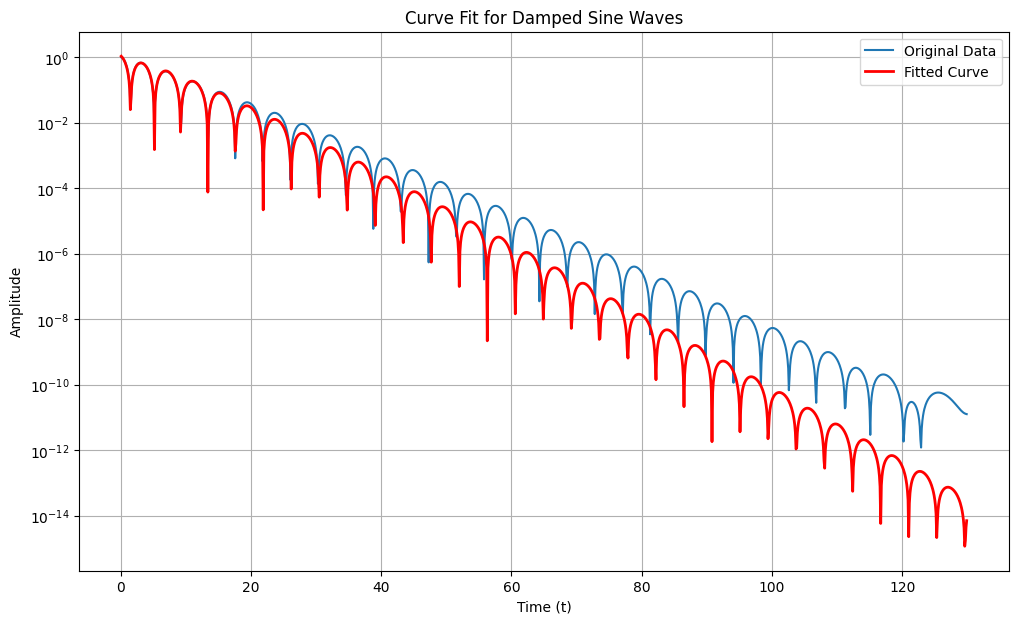

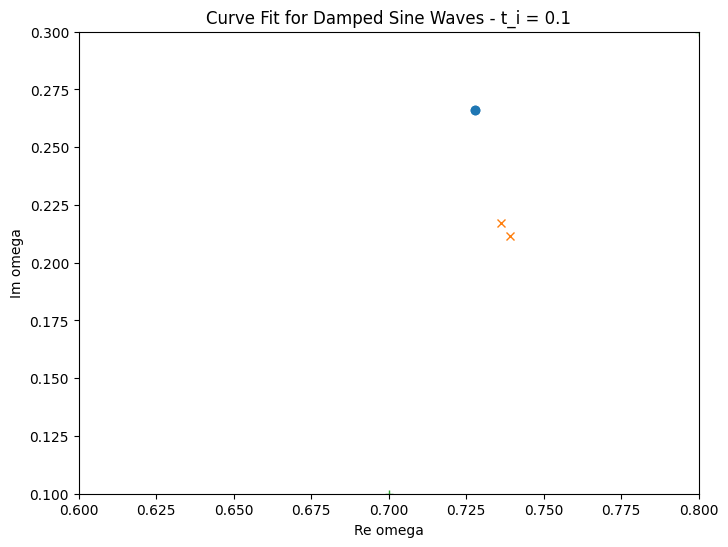

In [147]:
import numpy as np
from varpro import *

def examplePhiFunction(alpha,t):
    Phi = np.empty([t.shape[0],2])
    Phi[:,0] = np.multiply(np.exp(- alpha[0] * t),np.cos(alpha[1] * t + alpha[2]))
    Phi[:,1] = np.multiply(np.exp(- alpha[3] * t),np.cos(alpha[4] * t + alpha[5]))

    Ind = np.array([[0,0,0,1,1,1],[0,1,2,3,4,5]])
    
    dPhi = np.empty([t.shape[0],6])
    dPhi[:,0] = np.multiply(- np.ndarray.flatten(t),Phi[:,0])
    dPhi[:,1] = np.multiply(np.multiply(- t,np.exp(- alpha[0] * t)),np.sin(alpha[1] * t + alpha[2]))
    dPhi[:,2] = np.multiply(np.multiply(- 1,np.exp(- alpha[0] * t)),np.sin(alpha[1] * t + alpha[2]))
    dPhi[:,3] = np.multiply(- np.ndarray.flatten(t),Phi[:,1])
    dPhi[:,4] = np.multiply(np.multiply(- t,np.exp(- alpha[3] * t)),np.sin(alpha[4] * t + alpha[5]))
    dPhi[:,5] = np.multiply(np.multiply(- 1,np.exp(- alpha[3] * t)),np.sin(alpha[4] * t + alpha[5]))
    return Phi,dPhi,Ind

t = t_data[1:]
y = y_data[1:]
w = np.ones((len(t)))
# lambda0, omega0, phi0, lambda1, omega1, phi1 = 0.1, 0.7, 0.0, 0.3, 0.8, 0.1
alphainit = np.array([0.1,0.7,0.0,0.3,0.8,3.14])

alpha,c,wresid,resid_norm,y_est,CorMx,std_dev_params = varpro(t,y,w,alphainit,2,lambda alpha: examplePhiFunction(alpha,t))
print("lambda0=",alpha[0],"omega0=",alpha[1],"phi0=",alpha[2],"lambda1=",alpha[3],"omega1=",alpha[4],"phi1=",alpha[5])
print("A0=",c[0],"A1=",c[1])

def fit_func(t_data, c, alpha_list):
    """
    フィッティング対象の関数：2つの減衰正弦波の和
    f(t) = A1*exp(lambda1*t)*sin(omega1*t+phi1) + A2*exp(lambda2*t)*sin(omega2*t+phi2)
    """
    A1, A2 = c
    lambda1, omega1, phi1, lambda2, omega2, phi2 = alpha_list
    term1 = A1 * np.exp(-lambda1 * t_data) * np.cos(omega1 * t_data + phi1)
    term2 = A2 * np.exp(-lambda2 * t_data) * np.cos(omega2 * t_data + phi2)
    return term1 + term2
plt.figure(figsize=(12, 7))
plt.semilogy(t_data, np.abs(y_data), label='Original Data')
plt.semilogy(t_data, np.abs(fit_func(t_data, c, alpha)), label='Fitted Curve', color='red', linewidth=2)
plt.title('Curve Fit for Damped Sine Waves')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

reqnm = [abs(alpha[1]), abs(alpha[4])]
imqnm = [abs(alpha[0]), abs(alpha[3])]
fig = plt.figure(figsize=(8, 6))
plt.plot(reqnm, imqnm, 'o')
plt.plot([0.7391984327078, 0.736312554], [0.2116451411183, 0.217234709569], 'x')
plt.plot([alphainit[1], alphainit[4]], [alphainit[0], alphainit [3]], '+')
plt.xlim(0.6, 0.8)
plt.ylim(0.10, 0.3)
plt.title(f'Curve Fit for Damped Sine Waves - t_i = {t_data[deltai*i]}')
plt.xlabel('Re omega')    
plt.ylabel('Im omega') 
plt.show() # メモリを解放するために図を閉じる

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import numpy as np
from varpro import *
import shutil

# 1. アニメーションのパラメータ設定
num_frames = 100  # フレーム数
frame_duration = 10  # 各フレームの表示時間（ミリ秒）
deltai = 1

# 2. フレームを保存するディレクトリの作成
output_dir = "animation_frames"
os.makedirs(output_dir, exist_ok=True)

# 2. Def fit
def examplePhiFunction(alpha,t):
    Phi = np.empty([t.shape[0],2])
    Phi[:,0] = np.multiply(np.exp(- alpha[0] * t),np.cos(alpha[1] * t + alpha[2]))
    Phi[:,1] = np.multiply(np.exp(- alpha[3] * t),np.cos(alpha[4] * t + alpha[5]))

    Ind = np.array([[0,0,0,1,1,1],[0,1,2,3,4,5]])
    
    dPhi = np.empty([t.shape[0],6])
    dPhi[:,0] = np.multiply(- np.ndarray.flatten(t),Phi[:,0])
    dPhi[:,1] = np.multiply(np.multiply(- t,np.exp(- alpha[0] * t)),np.sin(alpha[1] * t + alpha[2]))
    dPhi[:,2] = np.multiply(np.multiply(- 1,np.exp(- alpha[0] * t)),np.sin(alpha[1] * t + alpha[2]))
    dPhi[:,3] = np.multiply(- np.ndarray.flatten(t),Phi[:,1])
    dPhi[:,4] = np.multiply(np.multiply(- t,np.exp(- alpha[3] * t)),np.sin(alpha[4] * t + alpha[5]))
    dPhi[:,5] = np.multiply(np.multiply(- 1,np.exp(- alpha[3] * t)),np.sin(alpha[4] * t + alpha[5]))
    return Phi,dPhi,Ind

# 解決策 1: 結果を保存するための空のリストを初期化
reqnm_history1 = []
imqnm_history1 = []
reqnm_history2 = []
imqnm_history2 = []

# 3. 各フレームの画像を生成して保存
print("Generating frames...")
alphainit = np.array([0.17792,0.74734,0.0,0.54783,0.693422,0.0])
for i in range(num_frames):

    try:
        t = t_data[deltai*i:]
        y = y_data[deltai*i:]
        w = np.ones((len(t)))
         # 解決策 2: 次のループのために初期値を更新する
        # alphainit = np.array([0.17792,0.74734,0.0,0.54783,0.693422,0.0])
        alpha,c,wresid,resid_norm,y_est,CorMx,std_dev_params = varpro(t,y,w,alphainit,2,lambda alpha: examplePhiFunction(alpha,t)) 
        alphainit = alpha

        reqnm_history1.append(abs(alpha[1]))
        imqnm_history1.append(abs(alpha[0]))
        reqnm_history2.append(abs(alpha[4]))
        imqnm_history2.append(abs(alpha[3]))

        # # QNMをプロット 
        reqnm = [abs(alpha[1]), abs(alpha[4])]
        imqnm = [abs(alpha[0]), abs(alpha[3])]
        fig = plt.figure(figsize=(8, 6))
        plt.plot(reqnm, imqnm, 'o')
        plt.plot(reqnm_history1, imqnm_history1, '-o', alpha=0.4)
        plt.plot(reqnm_history2, imqnm_history2, '-o', alpha=0.4)
        plt.plot([0.7391984327078, 0.736312554], [0.2116451411183, 0.217234709569], 'x')
        plt.plot([alphainit[1], alphainit[4]], [alphainit[0], alphainit [3]], '+')
        plt.xlim(0.6, 0.8)
        plt.ylim(0.10, 0.3)
        plt.title(f'Curve Fit for Damped Sine Waves - t_i = {t_data[deltai*i]}')
        plt.xlabel('Re omega')    
        plt.ylabel('Im omega') 
        # plt.xlim(0.72, 0.77)
        # plt.ylim(0.17, 0.23)
        frame_filename = os.path.join(output_dir, f"qnm_{i:04d}.png")
        plt.savefig(frame_filename, dpi=100) # dpiで解像度を設定
        plt.close(fig) # メモリを解放するために図を閉じる

        # # フィッティングの波形をプロット 
        # def fit_func(t_data, c, alpha_list):
        #     """
        #     フィッティング対象の関数：2つの減衰正弦波の和
        #     f(t) = A1*exp(lambda1*t)*sin(omega1*t+phi1) + A2*exp(lambda2*t)*sin(omega2*t+phi2)
        #     """
        #     A1, A2 = c
        #     lambda1, omega1, phi1, lambda2, omega2, phi2 = alpha_list
        #     term1 = A1 * np.exp(-lambda1 * t_data) * np.cos(omega1 * t_data + phi1)
        #     term2 = A2 * np.exp(-lambda2 * t_data) * np.cos(omega2 * t_data + phi2)
        #     return term1 + term2
        # fig = plt.figure(figsize=(12, 7))
        # plt.semilogy(t_data, np.abs(y_data), label='Original Data')
        # plt.semilogy(t_data, np.abs(fit_func(t_data, c, alpha)), label='Fitted Curve', color='red', linewidth=2)
        # plt.title('Curve Fit for Damped Sine Waves')
        # plt.xlabel('Time (t)')
        # plt.ylabel('Amplitude')
        # plt.legend()
        # plt.grid(True)
        # frame_filename = os.path.join(output_dir, f"qnm_{i:04d}.png")
        # plt.savefig(frame_filename, dpi=100) # dpiで解像度を設定
        # plt.close(fig) # メモリを解放するために図を閉じる

        if (i + 1) % 10 == 0:
            print(f"  {i+1} frames generated...")

    except RuntimeError as e:
        print(f"Frame {i+1} generation failed: {e}")
        continue

# 4. 生成した画像を読み込み、GIFアニメーションを作成
print("Creating GIF animation...")
image_files = sorted([os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.png')])

if not image_files:
    print("No PNG images found in the output directory. Animation cannot be created.")
else:
    images = []
    for filename in image_files:
        images.append(Image.open(filename))

    # 最初の画像を使って、残りの画像を結合
    if images:
        images[0].save(
            'animation.gif',
            save_all=True,
            append_images=images[1:],
            duration=frame_duration,
            loop=0  # 0は無限ループ
        )
        print("Animation 'animation.gif' created successfully!")
    else:
        print("No images were loaded for animation creation.")

# 5. 生成したフレーム画像を削除（オプション）
output_dir = "animation_frames"
if os.path.exists(output_dir):
    try:
        shutil.rmtree(output_dir)
        print(f"ディレクトリ '{output_dir}' を正常に削除しました。")
    except OSError as e:
        print(f"エラー: ディレクトリの削除に失敗しました。 {e.filename} - {e.strerror}.")
else:
    print(f"ディレクトリ '{output_dir}' が見つかりません。")

Generating frames...


## Varpro (AC model)

In [112]:
import numpy as np
from varpro import *

def examplePhiFunction(alpha,t):
    Phi = np.empty([t.shape[0],4])
    Phi[:,0] = np.multiply(np.exp(- alpha[0] * t),np.cos(alpha[1] * t))
    Phi[:,1] = np.multiply(t,np.exp(- alpha[0] * t),np.cos(alpha[1] * t ))
    Phi[:,2] = np.multiply(np.exp(- alpha[0] * t),np.sin(alpha[1] * t))
    Phi[:,3] = np.multiply(t,np.exp(- alpha[0] * t),np.sin(alpha[1] * t ))

    Ind = np.array([[0,0,1,1,2,2,3,3],[0,1,0,1,0,1,0,1]])
    
    dPhi = np.empty([t.shape[0],8])
    dPhi[:,0] = np.multiply(- np.ndarray.flatten(t),Phi[:,0])
    dPhi[:,1] = np.multiply(np.multiply(- t,np.exp(- alpha[0] * t)),np.sin(alpha[1] * t ))
    dPhi[:,2] = np.multiply(- np.ndarray.flatten(t),Phi[:,1])
    dPhi[:,3] = np.multiply(np.multiply(- t*t,np.exp(- alpha[0] * t)),np.sin(alpha[1] * t))
    dPhi[:,4] = np.multiply(- np.ndarray.flatten(t),Phi[:,2])
    dPhi[:,5] = np.multiply(np.multiply(t,np.exp(- alpha[0] * t)),np.cos(alpha[1] * t ))
    dPhi[:,6] = np.multiply(- np.ndarray.flatten(t),Phi[:,3])
    dPhi[:,7] = np.multiply(np.multiply(t*t,np.exp(- alpha[0] * t)),np.cos(alpha[1] * t))
    return Phi,dPhi,Ind

t = t_data[1:]
y = y_data[1:]
w = np.ones((len(t)))
# lambda0, omega0, phi0, lambda1, omega1, phi1 = 0.1, 0.7, 0.0
alphainit = np.array([0.17792,0.74734])

alpha,c,wresid,resid_norm,y_est,CorMx,std_dev_params = varpro(t,y,w,alphainit,4,lambda alpha: examplePhiFunction(alpha,t))
print("lambda0=",alpha[0],"omega0=",alpha[1])
print("A0=",c[0],"A1=",c[1]," A2=",c[2]," A3=",c[3])

# def fit_func(t_data, c, alpha_list):
#     """
#     フィッティング対象の関数：2つの減衰正弦波の和
#     f(t) = A1*exp(lambda1*t)*sin(omega1*t+phi1) + A2*exp(lambda2*t)*sin(omega2*t+phi2)
#     """
#     A1, A2 = c
#     lambda1, omega1, phi1, lambda2, omega2, phi2 = alpha_list
#     term1 = A1 * np.exp(-lambda1 * t_data) * np.cos(omega1 * t_data + phi1)
#     term2 = A2 * np.exp(-lambda2 * t_data) * np.cos(omega2 * t_data + phi2)
#     return term1 + term2
# plt.figure(figsize=(12, 7))
# plt.semilogy(t_data, np.abs(y_data), label='Original Data')
# plt.semilogy(t_data, np.abs(fit_func(t_data, c, alpha)), label='Fitted Curve', color='red', linewidth=2)
# plt.title('Curve Fit for Damped Sine Waves')
# plt.xlabel('Time (t)')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid(True)
# plt.show()

reqnm = [abs(alpha[1])]
imqnm = [abs(alpha[0])]
fig = plt.figure(figsize=(8, 6))
plt.plot(reqnm, imqnm, 'o')
plt.plot([0.7391984327078, 0.736312554], [0.2116451411183, 0.217234709569], 'x')
plt.plot([alphainit[1]], [alphainit[0]], '+')
plt.xlim(0.6, 0.8)
plt.ylim(0.10, 0.3)
plt.title(f'Curve Fit for Damped Sine Waves - t_i = {t_data[deltai*i]}')
plt.xlabel('Re omega')    
plt.ylabel('Im omega') 
plt.show() # メモリを解放するために図を閉じる

RankError: 
The linear parameters are not well-determined.
The rank of the matrix in the subproblem is 3,
which is less than the number of linear parameters (4).

Linear parameters:
    1.0845063799817538 0.008356437976122826 -0.6437552289860506 0.008356437976125036
Nonlinear parameters:
    0.17792 0.74734